Analysis Of Linear Regression using dummy data

In [5]:
import numpy as np 
# imports the NumPy library and assigns it the alias np

In [6]:
data = np.loadtxt("Datasets/data.csv", delimiter=",")
# np.loadtxt() function is used to load data from a text file, in this case, a CSV (Comma-Separated Values) file.
# delimiter=", ": This specifies the delimiter used in the CSV file. In this case, it's a comma (,), indicating that the values in the CSV file are separated by commas.
# np.loadtxt() function returns a NumPy array containing the data from the CSV file.

In [9]:
print(data.shape)
# we have 100 rows and 2 columns

(100, 2)


In [12]:
# spliting the data into X and Y
x = data[:, 0] 
# give me all the rows and the 0th column
y =  data[:, 1]
# give me all the rows and the 1st column

In [16]:
print(x.shape)
print(y.shape)
# so both are one dimensional array

(100,)
(100,)


In [20]:
# spliting it into training and testing
from sklearn import model_selection
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(x, y)
# it will split both the arrays in to two parts, training and testing
# 75% into training and 25% into testing
# so now we have our data ready

In [22]:
# creating object of the algorithm
from sklearn.linear_model import LinearRegression
algorithm1 = LinearRegression()

In [31]:
# algorithm1.fit(X_train, Y_train)
# ValueError: Expected 2D array, got 1D array instead
# it doesnot want 1D array
# bcz generally we have more than one independent column and one dependent column.

In [35]:
# we can covert the 1D-array into a 2D-array
# we have a fn. called reshape()
x = x.reshape(-1, 1)
print(x.shape)
#  this line effectively transforms the original array into a two-dimensional array with one column
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(x, y)

(100, 1)


In [36]:
algorithm1.fit(X_train, Y_train)
# training the algorithm
# now the linear regression should have used this data to figure out the line on the graph.
# y = mx + c

LinearRegression()

In [39]:
# to look at m and c, there is a way, what we can do is:
print(algorithm1.coef_) 
# it is giving the slope i.e. m
print(algorithm1.intercept_)
# it is giving the intercept i.e. c

# this is what it is trained, this is parameter it has calculated to.

[1.31579699]
8.97177454430264


In [40]:
# lets quickly plot our training data along with these parameters(m and c)
import matplotlib.pyplot as plt

In [59]:
# ploting mx + c line
m = algorithm1.coef_[0]
# since algorithm1.coef_ is an array of coefficents, but we have only one coefficient
c =  algorithm1.intercept_
x_line = np.arange(30, 70, 0.1)
# This line creates an array x_line containing values from 0 to 10 (exclusive) with a step size of 0.1. 
y_line =  m * x_line + c
# x_line is an nparray, m is an integer
# so nparray * integer will multiply all those elements with the integer
# + c will add c to all these integers as well
# Using the coefficients 
# m and c, this line calculates the corresponding y-values for each x-value in x_line.
# The result is a set of y-values that define the line mx+c.

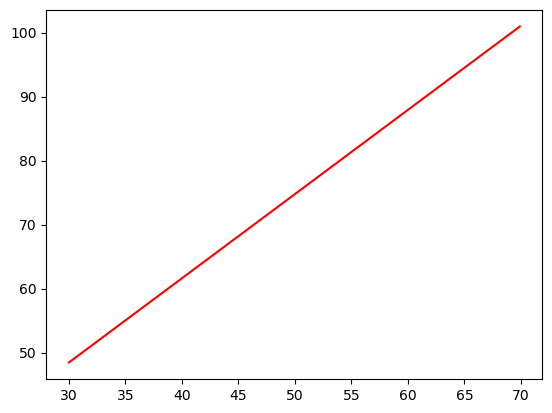

In [68]:
plt.plot(x_line, y_line, "r")
plt.show()
# at 0 the value is 8.97177454430264

(75, 1)
(75,)
(75,)
(75, 1)


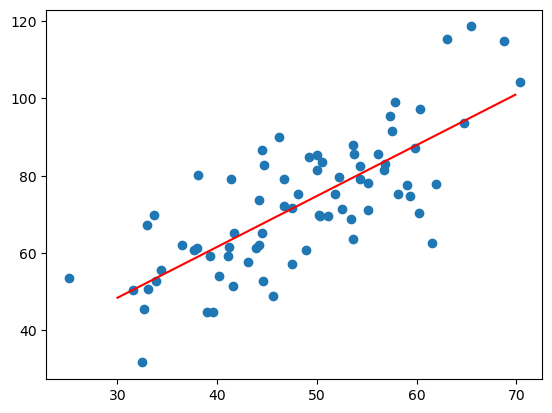

In [87]:
plt.plot(x_line, y_line, "r")
# now scatter the training data points
print(X_train.shape)
print(Y_train.shape)
# first lets reshape X_train to 1D-array
train_1d = X_train.reshape(75)
print(train_1d.shape)
print(X_train.shape)
plt.scatter(train_1d, Y_train)
plt.show()

(25, 1)


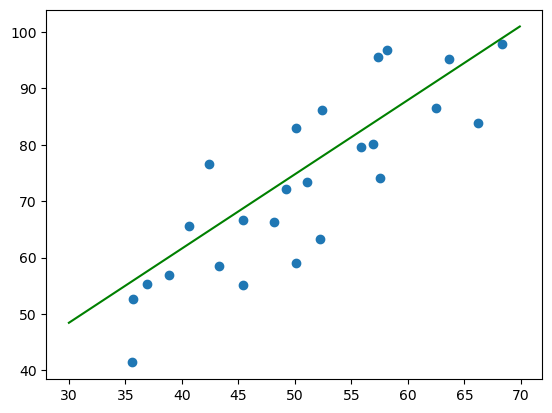

In [90]:
# drawing the line again for testing data
plt.plot(x_line, y_line, "g")

print(X_test.shape)
train_1d = X_test.reshape(25)
plt.scatter(train_1d, Y_test)
plt.show()

In [95]:
score_on_testdata = algorithm1.score(X_test, Y_test)
score_on_trainingdata = algorithm1.score(X_train, Y_train)

In [96]:
print(score_on_testdata)
print(score_on_trainingdata)

0.6863099659844802
0.5731608961436223
